In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
import cv2

# Dataset

Nossa base de dados contém informações referente a fotometria da Supernova SN2004gs.

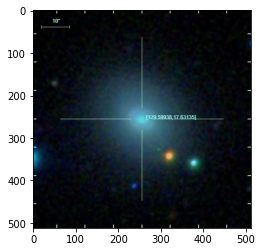

In [26]:
#importando a base de dados
base = pd.read_csv("sn5.csv")

base.head(5)

img = cv2.imread("img_sn.png")

plt.imshow(img)

A fotometria da minha base tem informações da intensidade da luz em função do tempo em vários comprimentos de onda (banda espectral).
O gráfico a seguir mostra a fotometria nas principais bandas espectrais medidas.

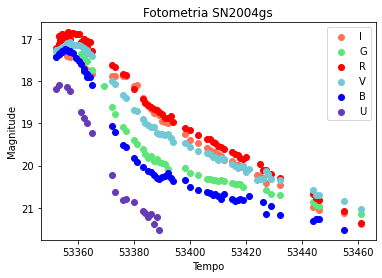

In [3]:
base_i = base.loc[(base['band'] == 'I') | (base['band'] == 'i')]
base_g = base.loc[(base['band'] == 'G' )| (base['band'] == 'g')]
base_r = base.loc[(base['band'] == 'R') | (base['band'] == 'r')]
base_v = base.loc[(base['band'] == 'V') | (base['band'] == 'v')]
base_b = base.loc[(base['band'] == 'B') | (base['band'] == 'b')]
base_u = base.loc[(base['band'] == 'U') | (base['band'] == 'u')]

plt.scatter(base_i['time'], base_i['magnitude'], color = '#ff7256', label = 'I')
plt.scatter(base_g['time'], base_g['magnitude'], color = '#5de578', label = 'G')
plt.scatter(base_r['time'], base_r['magnitude'], color = 'red', label = 'R')
plt.scatter(base_v['time'], base_v['magnitude'], color = '#70c9d5', label = 'V')
plt.scatter(base_b['time'], base_b['magnitude'], color = 'blue', label = 'B')
plt.scatter(base_u['time'], base_u['magnitude'], color = '#673ab7', label = 'U')
plt.gca().invert_yaxis()
plt.title('Fotometria SN2004gs')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# Selecionar a banda espectral

Irei usar apenas uma banda para realizar a previsão.
Essa parte do código escolhe a banda que tem informações de mais dias do evento da Supernova e me retorna apenas os dados da banda selecionada, salvo na variável base_banda.

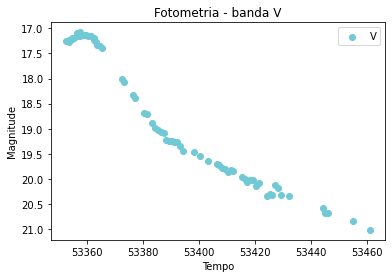

In [4]:
bandaComMaisDias = base['band'].value_counts().head(1)
nomeBanda = bandaComMaisDias.index.tolist()
base_banda = base.loc[(base['band']) == nomeBanda[0]]  

#Apenas para vizualização da base
base_banda.head(5)

#Gráfico da banda selecionada para realizarmos a previsão
plt.scatter(base_banda['time'], base_banda['magnitude'], color = '#70c9d5', label = "V")
plt.gca().invert_yaxis()
plt.title('Fotometria - banda V')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

# Dados importantes

Aqui salvamos algumas variáveis que armazenam informações importantes para aplicarmos os algoritmos de previsão.

In [5]:
diasASimular = 20
totalDeDiasReais = base_banda.shape[0]

magnitude = base_banda['magnitude'].to_numpy()
tempo = base_banda['time'].to_numpy()

xTrain = np.arange(0, len(tempo[0:totalDeDiasReais]))
yTrain = magnitude[0:totalDeDiasReais]

xPredict = np.arange(0, len(xTrain + diasASimular))

# Regressão Linear

In [6]:
#treino
LRModel = LinearRegression()
try:
    LRModel.fit(xTrain.reshape(-1, 1), yTrain)
except:
    pass

#Previsão
linear = LRModel.predict(xPredict.reshape(-1, 1))    

Cálculo do erro

In [7]:
eLinear = mean_squared_error(magnitude[0:totalDeDiasReais + diasASimular], linear)
print(eLinear)

0.09528192528752726


Gráfico

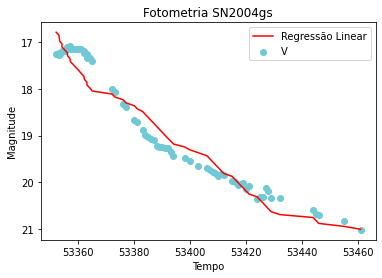

In [8]:
plt.scatter(tempo, magnitude, color = '#70c9d5', label = 'V')    
plt.plot(tempo, linear, color="red", label = "Regressão Linear")
plt.gca().invert_yaxis()

plt.title('Fotometria SN2004gs')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()

# Regressão Polinomial de Grau 2

In [9]:
#Treino
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(xTrain.reshape(-1, 1))
    
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(xPredict.reshape(-1, 1))
grau2 = polyLinearRegression.predict(XPoly)

Cálculo do erro

In [10]:
eGrau2 = mean_squared_error(magnitude[0:totalDeDiasReais + diasASimular], grau2)
print(eGrau2)

0.08885699240902689


Gráfico

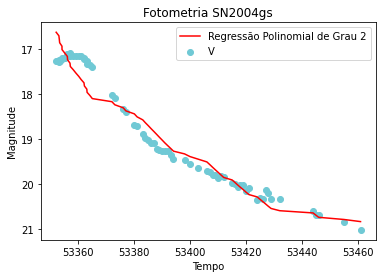

In [11]:
plt.scatter(tempo, magnitude, color = '#70c9d5', label = 'V')    
plt.plot(tempo, grau2, color="red", label = "Regressão Polinomial de Grau 2")
plt.gca().invert_yaxis()

plt.title('Fotometria SN2004gs')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()


# Regressão Polinomial de Grau 3

In [12]:
#Treino
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(xTrain.reshape(-1, 1))
    
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(xPredict.reshape(-1, 1))
grau3 = polyLinearRegression.predict(XPoly)

Cálculo do erro

In [13]:
eGrau3 = mean_squared_error(magnitude[0:totalDeDiasReais + diasASimular], grau3)
print(eGrau3)

0.06552630097809578


Gráfico

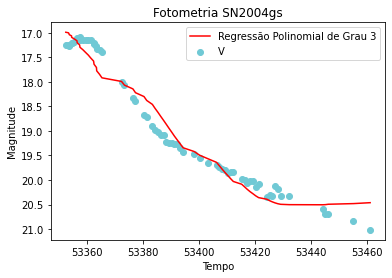

In [14]:
plt.scatter(tempo, magnitude, color = '#70c9d5', label = 'V')    
plt.plot(tempo, grau3, color="red", label = "Regressão Polinomial de Grau 3")
plt.gca().invert_yaxis()

plt.title('Fotometria SN2004gs')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()

# Árvore de Decisão

In [15]:
#Treino
regressor = DecisionTreeRegressor()
regressor.fit(xTrain.reshape(-1, 1), yTrain)

#predição
arvore = regressor.predict(xPredict.reshape(-1, 1))

Cálculo do erro

In [16]:
eArvore = mean_squared_error(magnitude[0:totalDeDiasReais + diasASimular], arvore)
print(eArvore)

0.0


Gráfico

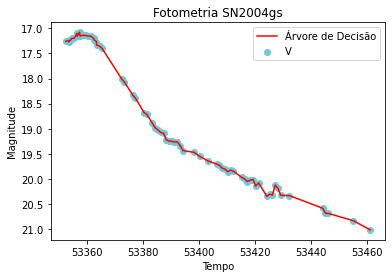

In [17]:
plt.scatter(tempo, magnitude, color = '#70c9d5', label = 'V')    
plt.plot(tempo, arvore, color="red", label = "Árvore de Decisão")
plt.gca().invert_yaxis()

plt.title('Fotometria SN2004gs')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()

# Random Forest

In [18]:
#Treino
regressor = DecisionTreeRegressor()
regressor.fit(xTrain.reshape(-1, 1), yTrain)

regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(xTrain.reshape(-1, 1), yTrain)
    
#predição
forest = regressor.predict(xPredict.reshape(-1, 1))

Cálculo do erro

In [19]:
eForest = mean_squared_error(magnitude[0:totalDeDiasReais + diasASimular], forest)
print(eForest)

0.0010545138573529597


Gráfico

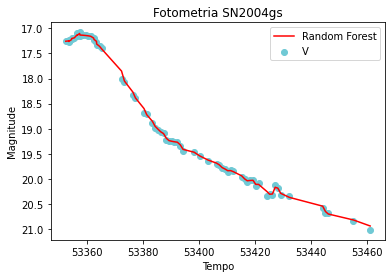

In [20]:
plt.scatter(tempo, magnitude, color = '#70c9d5', label = 'V')    
plt.plot(tempo, forest, color="red", label = "Random Forest")
plt.gca().invert_yaxis()

plt.title('Fotometria SN2004gs')
plt.xlabel('Tempo')
plt.ylabel('Magnitude')
plt.legend()

# Resultado

In [21]:
erro_list = [("Regressão Linear", eLinear), ("Regressão Polinomial de Grau 2", eGrau2), ("Regressão Polinomial de Grau 3", eGrau3), ("Arvore de Decisão", eArvore), ("Random Forest", eForest)]
algoritmo, erro =  min(erro_list)
print("O algoritmo que obteve melhor resultado é a ", algoritmo)
print("O valor do erro foi de ", erro)

O algoritmo que obteve melhor resultado é a  Arvore de Decisão
O valor do erro foi de  0.0
